In [1]:
import os
import shutil
import utilities as rocku
import matplotlib.pyplot as plt
import tomopy
import numpy as np
import pandas as pd
import pprint
import dxchange
from pystackreg import StackReg
import multiprocessing as mp
import timeit
from tqdm import tqdm
ncore = mp.cpu_count()
print("CPU cores:", ncore)

CPU cores: 64


In [2]:
# need to change
ipts="34812"
# scan_type = 'ct_scans'
scan_type = 'radiographs'
# scan_type = 'alignment_calibration'

In [3]:
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/" + scan_type
sorted(os.listdir(scan_loc))

['2024_10_18_2p1_3_bee_noCollimator',
 '2024_10_18_2p1_3_bee_noCollimator_pos2',
 '2024_10_18_2p1_3_leaf_0noCollimator',
 '2024_10_18_2p1_3_waterwedge_Collimator_1rpm',
 '2024_10_18_2p1_3_waterwedge_Collimator_p1rpm',
 '2024_10_18_2p1_3_waterwedge_Collimator_static',
 '2024_10_18_2p1_3_waterwedge_noCollimator',
 '2024_10_18_NoSample_collimator_rotating',
 '2024_10_18_NoSample_collimator_static',
 '2024_10_18_WaterWedge_collimator_rotating',
 '2024_10_18_bee1_collimator_0p1rpm',
 '2024_10_18_bee1_collimator_1rpm',
 '2024_10_18_bee1_collimator_static',
 '2024_10_18_leaf1_collimator_rotating0p1rpm',
 '2024_10_18_leaf1_collimator_rotating1rpm',
 '2024_10_18_leaf1_collimator_static']

In [4]:
ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ob"
# ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/radiographs"
sorted(os.listdir(ob_loc))

['2024_10_18_align']

In [5]:
dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/dc"
sorted(os.listdir(dc_loc))

['2024_10_18_NoSample_collimator_rotating', '2024_10_18_align']

In [6]:
###################### need to change start
sample_name = "2024_10_18_2p1_3_waterwedge_Collimator_static"
scan_dir = os.path.join(scan_loc, sample_name)
ob_dir = os.path.join(ob_loc, "2024_10_18_align")
dc_dir = os.path.join(dc_loc, "2024_10_18_NoSample_collimator_rotating")
# ct_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
# ob_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
# dc_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
ob_name = "*OB*" # Will not be used if follows the default file structure
dc_name = "*DC*" # Will not be used if follows the default file structure
gamma_diff = 20
###################### need to change end

# Sort and filter scan files

In [9]:
fname_list = os.listdir(scan_dir)
# fname_list.pop(0)
fname_list.sort()
print(len(fname_list))
fname_list

26


['2p1_3_waterwedge_collimator_static_0000_0479.tiff',
 '2p1_3_waterwedge_collimator_static_0000_0480.tiff',
 '2p1_3_waterwedge_collimator_static_0000_0481.tiff',
 '2p1_3_waterwedge_collimator_static_0001_0482.tiff',
 '2p1_3_waterwedge_collimator_static_0001_0483.tiff',
 '2p1_3_waterwedge_collimator_static_0001_0484.tiff',
 '2p1_3_waterwedge_collimator_static_0002_0485.tiff',
 '2p1_3_waterwedge_collimator_static_0002_0486.tiff',
 '2p1_3_waterwedge_collimator_static_0002_0487.tiff',
 '2p1_3_waterwedge_collimator_static_0004_0488.tiff',
 '2p1_3_waterwedge_collimator_static_0004_0489.tiff',
 '2p1_3_waterwedge_collimator_static_0004_0490.tiff',
 '2p1_3_waterwedge_collimator_static_0008_0491.tiff',
 '2p1_3_waterwedge_collimator_static_0008_0492.tiff',
 '2p1_3_waterwedge_collimator_static_0008_0493.tiff',
 '2p1_3_waterwedge_collimator_static_0010_0477.tiff',
 '2p1_3_waterwedge_collimator_static_0010_0478.tiff',
 '2p1_3_waterwedge_collimator_static_0016_0494.tiff',
 '2p1_3_waterwedge_collimato

In [10]:
to_rmv = [
]
fname_list = rocku.remove_fnames(fname_list, to_rmv)

26
26


In [11]:
ob_list = os.listdir(ob_dir)
# fname_list.pop(0)
ob_list.sort()
print(len(ob_list))
# ob_list = ob_list[:3]
ob_list

35


['OB_0001_0050.tiff',
 'OB_0001_0051.tiff',
 'OB_0001_0052.tiff',
 'OB_0001_0053.tiff',
 'OB_0001_0054.tiff',
 'OB_0002_0055.tiff',
 'OB_0002_0056.tiff',
 'OB_0002_0057.tiff',
 'OB_0002_0058.tiff',
 'OB_0002_0059.tiff',
 'OB_0004_0060.tiff',
 'OB_0004_0061.tiff',
 'OB_0004_0062.tiff',
 'OB_0004_0063.tiff',
 'OB_0004_0064.tiff',
 'OB_0008_0065.tiff',
 'OB_0008_0066.tiff',
 'OB_0008_0067.tiff',
 'OB_0008_0068.tiff',
 'OB_0008_0069.tiff',
 'OB_0016_0070.tiff',
 'OB_0016_0071.tiff',
 'OB_0016_0072.tiff',
 'OB_0016_0073.tiff',
 'OB_0016_0074.tiff',
 'OB_0032_0075.tiff',
 'OB_0032_0076.tiff',
 'OB_0032_0077.tiff',
 'OB_0032_0078.tiff',
 'OB_0032_0079.tiff',
 'OB_0064_0617.tiff',
 'OB_0064_0618.tiff',
 'OB_0064_0619.tiff',
 'OB_0064_0620.tiff',
 'OB_0064_0621.tiff']

In [12]:
to_rmv = [
]
ob_list = rocku.remove_fnames(ob_list, to_rmv)

35
35


In [13]:
dc_list = os.listdir(dc_dir)
# fname_list.pop(0)
dc_list.sort()
print(len(dc_list))
dc_list

40


['DC_0000_0161.tiff',
 'DC_0000_0162.tiff',
 'DC_0000_0163.tiff',
 'DC_0000_0164.tiff',
 'DC_0000_0165.tiff',
 'DC_0001_0156.tiff',
 'DC_0001_0157.tiff',
 'DC_0001_0158.tiff',
 'DC_0001_0159.tiff',
 'DC_0001_0160.tiff',
 'DC_0002_0151.tiff',
 'DC_0002_0152.tiff',
 'DC_0002_0153.tiff',
 'DC_0002_0154.tiff',
 'DC_0002_0155.tiff',
 'DC_0004_0146.tiff',
 'DC_0004_0147.tiff',
 'DC_0004_0148.tiff',
 'DC_0004_0149.tiff',
 'DC_0004_0150.tiff',
 'DC_0008_0141.tiff',
 'DC_0008_0142.tiff',
 'DC_0008_0143.tiff',
 'DC_0008_0144.tiff',
 'DC_0008_0145.tiff',
 'DC_0016_0136.tiff',
 'DC_0016_0137.tiff',
 'DC_0016_0138.tiff',
 'DC_0016_0139.tiff',
 'DC_0016_0140.tiff',
 'DC_0032_0131.tiff',
 'DC_0032_0132.tiff',
 'DC_0032_0133.tiff',
 'DC_0032_0134.tiff',
 'DC_0032_0135.tiff',
 'DC_0064_0126.tiff',
 'DC_0064_0127.tiff',
 'DC_0064_0128.tiff',
 'DC_0064_0129.tiff',
 'DC_0064_0130.tiff']

In [14]:
to_rmv = [
]
dc_list = rocku.remove_fnames(dc_list, to_rmv)

40
40


In [15]:
scan_exposure_list = rocku.get_exposure_list(fname_list)
ob_exposure_list = rocku.get_exposure_list(ob_list)
dc_exposure_list = rocku.get_exposure_list(dc_list)
exposure_list = sorted(list(set(scan_exposure_list).intersection(ob_exposure_list).intersection(dc_exposure_list)))
exposure_list

['_0001_', '_0002_', '_0004_', '_0008_', '_0016_', '_0032_', '_0064_']

In [16]:
_fname_list = rocku.filter_list(fname_list, exposure_list[0])
_fname_list

['2p1_3_waterwedge_collimator_static_0001_0482.tiff',
 '2p1_3_waterwedge_collimator_static_0001_0483.tiff',
 '2p1_3_waterwedge_collimator_static_0001_0484.tiff']

In [17]:
######### Scan
_scan_raw = rocku.read_tiff_stack(scan_dir, _fname_list)
print(_scan_raw.shape)

3


3it [00:00, 34.52it/s]

(3, 6200, 6200)


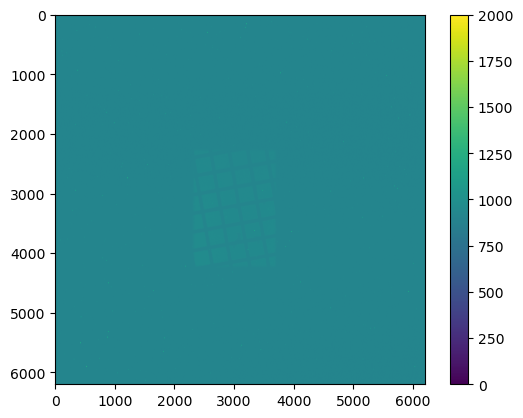

In [19]:
_scan_min = np.min(_scan_raw, axis=0)
plt.imshow(_scan_min, vmin=0, vmax=2000)
plt.colorbar()
plt.show()

ROI:


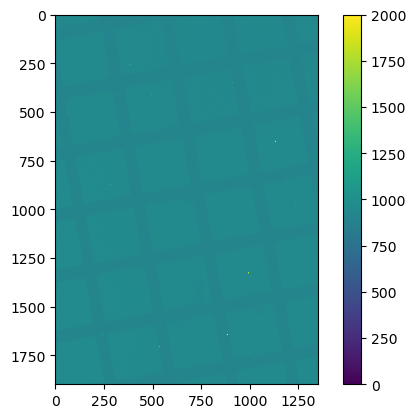

In [20]:
###################### need to change start
crop = True
# crop = False
crop_left = 2350#320
crop_right = 3700#1080
crop_top = 2300
crop_bottom = 4200
# crop_left = 2500
# crop_right = 4500
# crop_top = 200
# crop_bottom = 2350
###################### need to change end
# scan_crop = rocku.crop(scan_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# ob_crop = rocku.crop(ob_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# dc_crop = rocku.crop(dc_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
_scan_crop_min = rocku.crop(_scan_min, crop_left, crop_right, crop_top, crop_bottom, crop)
print("ROI:")
plt.imshow(_scan_crop_min, vmin=0, vmax=2000)
plt.colorbar()
plt.show()

# Normalize the selected list

In [25]:
scan_list = sorted(os.listdir(scan_loc))
scan_list

['2024_10_18_2p1_3_bee_noCollimator',
 '2024_10_18_2p1_3_bee_noCollimator_pos2',
 '2024_10_18_2p1_3_leaf_0noCollimator',
 '2024_10_18_2p1_3_waterwedge_Collimator_1rpm',
 '2024_10_18_2p1_3_waterwedge_Collimator_p1rpm',
 '2024_10_18_2p1_3_waterwedge_Collimator_static',
 '2024_10_18_2p1_3_waterwedge_noCollimator',
 '2024_10_18_NoSample_collimator_rotating',
 '2024_10_18_NoSample_collimator_static',
 '2024_10_18_WaterWedge_collimator_rotating',
 '2024_10_18_bee1_collimator_0p1rpm',
 '2024_10_18_bee1_collimator_1rpm',
 '2024_10_18_bee1_collimator_static',
 '2024_10_18_leaf1_collimator_rotating0p1rpm',
 '2024_10_18_leaf1_collimator_rotating1rpm',
 '2024_10_18_leaf1_collimator_static']

In [26]:
to_rmv = [
    '2024_10_18_2p1_3_bee_noCollimator',
 '2024_10_18_2p1_3_waterwedge_Collimator_p1rpm',
]
scan_list = rocku.remove_fnames(scan_list, to_rmv)
scan_list

16
14


['2024_10_18_2p1_3_bee_noCollimator_pos2',
 '2024_10_18_2p1_3_leaf_0noCollimator',
 '2024_10_18_2p1_3_waterwedge_Collimator_1rpm',
 '2024_10_18_2p1_3_waterwedge_Collimator_static',
 '2024_10_18_2p1_3_waterwedge_noCollimator',
 '2024_10_18_NoSample_collimator_rotating',
 '2024_10_18_NoSample_collimator_static',
 '2024_10_18_WaterWedge_collimator_rotating',
 '2024_10_18_bee1_collimator_0p1rpm',
 '2024_10_18_bee1_collimator_1rpm',
 '2024_10_18_bee1_collimator_static',
 '2024_10_18_leaf1_collimator_rotating0p1rpm',
 '2024_10_18_leaf1_collimator_rotating1rpm',
 '2024_10_18_leaf1_collimator_static']

In [27]:
bin_size = 1
# bin_size = None
##################################################
for each_scan in scan_list:
    scan_dir = os.path.join(scan_loc, each_scan)
    fname_list = sorted(os.listdir(scan_dir))
    scan_exposure_list = rocku.get_exposure_list(fname_list)
    exposure_list = sorted(list(set(scan_exposure_list).intersection(ob_exposure_list).intersection(dc_exposure_list)))
    for each_exposure in exposure_list:
        _fname_list = rocku.filter_list(fname_list, each_exposure)
        _ob_list = rocku.filter_list(ob_list, each_exposure)
        _dc_list = rocku.filter_list(dc_list, each_exposure)
        ######### Scan
        _scan_raw = rocku.read_tiff_stack(scan_dir, _fname_list)
        print(_scan_raw.shape)
        ######### OB
        _ob_raw = rocku.read_tiff_stack(ob_dir, _ob_list)
        print(_ob_raw.shape)
        ######### DC
        _dc_raw = rocku.read_tiff_stack(dc_dir, _dc_list)
        print(_dc_raw.shape)
        _scan_crop = rocku.crop(_scan_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
        _ob_crop = rocku.crop(_ob_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
        _dc_crop = rocku.crop(_dc_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
        _scan_crop = tomopy.misc.corr.remove_outlier_cuda(_scan_crop, gamma_diff).astype(np.ushort)
        _ob_crop = tomopy.misc.corr.remove_outlier_cuda(_ob_crop, gamma_diff).astype(np.ushort)
        _dc_crop = tomopy.misc.corr.remove_outlier_cuda(_dc_crop, gamma_diff).astype(np.ushort)
        if bin_size is None:
            bin_size = len(_fname_list)
        #####################
        #####################
        # Bin images
        if bin_size != 1:
            to_rmv = len(_fname_list)%bin_size
            if to_rmv == 0:
                _fname_list_rmv = _fname_list[:]
                _scan_crop_rmv = _scan_crop[:]
            else:
                _fname_list_rmv = _fname_list[:-to_rmv]
                _scan_crop_rmv = _scan_crop[:-to_rmv]
            _fname_list_bin = _fname_list_rmv[0::bin_size]
            _scan_crop_bin = np.array([np.mean(_scan_crop_rmv[i:i+bin_size], axis=0) for i in tqdm(range(0, len(_scan_crop_rmv), bin_size))]) 
        # Normalize
        if bin_size != 1:
            _scan_norm, _scan_mi_dc, _ob_mi_dc, _dc_med = rocku.normalize(_scan_crop_bin, _ob_crop, _dc_crop)
        else:
            _scan_norm, _scan_mi_dc, _ob_mi_dc, _dc_med = rocku.normalize(_scan_crop, _ob_crop, _dc_crop)
        # Save files
        save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized/" + each_scan# + '_Right'
        if bin_size != 1:
            save_to = save_to + "_binned_by_" + str(bin_size)
            _fname_list_save = _fname_list_bin[:]
        else:
            _fname_list_save = _fname_list[:]
        print('Saving to {} ...'.format(save_to))
        for i, e_name in tqdm(enumerate(_fname_list_save)):
        #     e_name = rocku.remove_1st_str(e_name)
            _fname = save_to + "/" + e_name
            dxchange.write_tiff(_scan_norm[i], fname=_fname, overwrite=True)

3


3it [00:00, 35.35it/s]


(3, 6200, 6200)
5


5it [00:00, 40.49it/s]


(5, 6200, 6200)
5


5it [00:00, 43.36it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_bee_noCollimator_pos2 ...


3it [00:00, 24.83it/s]


3


3it [00:00, 36.40it/s]


(3, 6200, 6200)
5


5it [00:00, 39.51it/s]


(5, 6200, 6200)
5


5it [00:00, 43.16it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_bee_noCollimator_pos2 ...


3it [00:00, 33.18it/s]


3


3it [00:00, 34.81it/s]


(3, 6200, 6200)
5


5it [00:00, 43.27it/s]


(5, 6200, 6200)
5


5it [00:00, 40.81it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_bee_noCollimator_pos2 ...


3it [00:00, 35.65it/s]


3


3it [00:00, 37.97it/s]


(3, 6200, 6200)
5


5it [00:00, 41.10it/s]


(5, 6200, 6200)
5


5it [00:00, 43.63it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_bee_noCollimator_pos2 ...


3it [00:00, 33.68it/s]


3


3it [00:00, 33.63it/s]


(3, 6200, 6200)
5


5it [00:00, 39.89it/s]


(5, 6200, 6200)
5


5it [00:00, 40.81it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_bee_noCollimator_pos2 ...


3it [00:00, 35.09it/s]


3


3it [00:00, 37.31it/s]


(3, 6200, 6200)
5


5it [00:00, 43.76it/s]


(5, 6200, 6200)
5


5it [00:00, 40.06it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_bee_noCollimator_pos2 ...


3it [00:00, 34.86it/s]


3


3it [00:00, 35.94it/s]


(3, 6200, 6200)
5


5it [00:00, 44.36it/s]


(5, 6200, 6200)
5


5it [00:00, 44.19it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_bee_noCollimator_pos2 ...


3it [00:00, 36.69it/s]


3


3it [00:00, 35.02it/s]


(3, 6200, 6200)
5


5it [00:00, 42.46it/s]


(5, 6200, 6200)
5


5it [00:00, 43.77it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_leaf_0noCollimator ...


3it [00:00, 36.04it/s]


3


3it [00:00, 34.69it/s]


(3, 6200, 6200)
5


5it [00:00, 40.77it/s]


(5, 6200, 6200)
5


5it [00:00, 40.34it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_leaf_0noCollimator ...


3it [00:00, 36.85it/s]


3


3it [00:00, 35.02it/s]


(3, 6200, 6200)
5


5it [00:00, 41.28it/s]


(5, 6200, 6200)
5


5it [00:00, 42.83it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_leaf_0noCollimator ...


3it [00:00, 34.95it/s]


3


3it [00:00, 38.64it/s]


(3, 6200, 6200)
5


5it [00:00, 41.83it/s]


(5, 6200, 6200)
5


5it [00:00, 43.96it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_leaf_0noCollimator ...


3it [00:00, 34.68it/s]


3


3it [00:00, 35.42it/s]


(3, 6200, 6200)
5


5it [00:00, 40.99it/s]


(5, 6200, 6200)
5


5it [00:00, 42.21it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_leaf_0noCollimator ...


3it [00:00, 35.83it/s]


3


3it [00:00, 37.41it/s]


(3, 6200, 6200)
5


5it [00:00, 42.64it/s]


(5, 6200, 6200)
5


5it [00:00, 42.72it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_leaf_0noCollimator ...


3it [00:00, 36.44it/s]


3


3it [00:00, 34.97it/s]


(3, 6200, 6200)
5


5it [00:00, 38.11it/s]


(5, 6200, 6200)
5


5it [00:00, 42.56it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_leaf_0noCollimator ...


3it [00:00, 28.53it/s]


3


3it [00:00, 35.78it/s]


(3, 6200, 6200)
5


5it [00:00, 38.92it/s]


(5, 6200, 6200)
5


5it [00:00, 38.59it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_1rpm ...


3it [00:00, 33.13it/s]


3


3it [00:00, 36.93it/s]


(3, 6200, 6200)
5


5it [00:00, 43.42it/s]


(5, 6200, 6200)
5


5it [00:00, 43.51it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_1rpm ...


3it [00:00, 36.50it/s]


3


3it [00:00, 35.52it/s]


(3, 6200, 6200)
5


5it [00:00, 44.15it/s]


(5, 6200, 6200)
5


5it [00:00, 42.34it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_1rpm ...


3it [00:00, 36.48it/s]


3


3it [00:00, 38.74it/s]


(3, 6200, 6200)
5


5it [00:00, 40.95it/s]


(5, 6200, 6200)
5


5it [00:00, 44.51it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_1rpm ...


3it [00:00, 35.95it/s]


3


3it [00:00, 38.48it/s]


(3, 6200, 6200)
5


5it [00:00, 44.32it/s]


(5, 6200, 6200)
5


5it [00:00, 40.87it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_1rpm ...


3it [00:00, 36.90it/s]


3


3it [00:00, 36.73it/s]


(3, 6200, 6200)
5


5it [00:00, 39.63it/s]


(5, 6200, 6200)
5


5it [00:00, 43.38it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_1rpm ...


3it [00:00, 37.04it/s]


3


3it [00:00, 33.44it/s]


(3, 6200, 6200)
5


5it [00:00, 38.97it/s]


(5, 6200, 6200)
5


5it [00:00, 40.72it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_1rpm ...


3it [00:00, 37.37it/s]


3


3it [00:00, 35.47it/s]


(3, 6200, 6200)
5


5it [00:00, 40.98it/s]


(5, 6200, 6200)
5


5it [00:00, 43.30it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_static ...


3it [00:00, 35.89it/s]


3


3it [00:00, 34.85it/s]


(3, 6200, 6200)
5


5it [00:00, 40.39it/s]


(5, 6200, 6200)
5


5it [00:00, 43.91it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_static ...


3it [00:00, 35.05it/s]


3


3it [00:00, 36.31it/s]


(3, 6200, 6200)
5


5it [00:00, 43.76it/s]


(5, 6200, 6200)
5


5it [00:00, 41.12it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_static ...


3it [00:00, 17.68it/s]


3


3it [00:00, 37.48it/s]


(3, 6200, 6200)
5


5it [00:00, 42.21it/s]


(5, 6200, 6200)
5


5it [00:00, 44.11it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_static ...


3it [00:00, 36.40it/s]


3


3it [00:00, 38.42it/s]


(3, 6200, 6200)
5


5it [00:00, 40.07it/s]


(5, 6200, 6200)
5


5it [00:00, 41.03it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_static ...


3it [00:00, 37.17it/s]


3


3it [00:00, 38.39it/s]


(3, 6200, 6200)
5


5it [00:00, 44.13it/s]

(5, 6200, 6200)


5


5it [00:00, 39.99it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_static ...


3it [00:00, 35.76it/s]


3


3it [00:00, 38.58it/s]


(3, 6200, 6200)
5


5it [00:00, 45.12it/s]


(5, 6200, 6200)
5


5it [00:00, 44.59it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_Collimator_static ...


3it [00:00, 34.61it/s]


3


3it [00:00, 37.22it/s]


(3, 6200, 6200)
5


5it [00:00, 42.23it/s]


(5, 6200, 6200)
5


5it [00:00, 43.61it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_noCollimator ...


3it [00:00, 34.56it/s]


3


3it [00:00, 34.02it/s]


(3, 6200, 6200)
5


5it [00:00, 40.69it/s]


(5, 6200, 6200)
5


5it [00:00, 40.16it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_noCollimator ...


3it [00:00, 34.91it/s]


3


3it [00:00, 37.62it/s]


(3, 6200, 6200)
5


5it [00:00, 40.60it/s]


(5, 6200, 6200)
5


5it [00:00, 42.31it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_noCollimator ...


3it [00:00, 35.20it/s]


3


3it [00:00, 33.61it/s]


(3, 6200, 6200)
5


5it [00:00, 41.44it/s]


(5, 6200, 6200)
5


5it [00:00, 43.53it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_noCollimator ...


3it [00:00, 36.58it/s]


3


3it [00:00, 36.84it/s]


(3, 6200, 6200)
5


5it [00:00, 40.75it/s]


(5, 6200, 6200)
5


5it [00:00, 41.56it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_noCollimator ...


3it [00:00, 36.99it/s]


3


3it [00:00, 34.44it/s]


(3, 6200, 6200)
5


5it [00:00, 43.38it/s]


(5, 6200, 6200)
5


5it [00:00, 43.89it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_noCollimator ...


3it [00:00, 33.85it/s]


3


3it [00:00, 35.14it/s]


(3, 6200, 6200)
5


5it [00:00, 38.80it/s]


(5, 6200, 6200)
5


5it [00:00, 43.26it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_2p1_3_waterwedge_noCollimator ...


3it [00:00, 35.09it/s]


3


3it [00:00, 33.76it/s]


(3, 6200, 6200)
5


5it [00:00, 40.92it/s]


(5, 6200, 6200)
5


5it [00:00, 38.77it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_rotating ...


3it [00:00, 35.45it/s]


3


3it [00:00, 33.65it/s]


(3, 6200, 6200)
5


5it [00:00, 43.63it/s]


(5, 6200, 6200)
5


5it [00:00, 43.80it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_rotating ...


3it [00:00, 37.57it/s]


3


3it [00:00, 38.37it/s]


(3, 6200, 6200)
5


5it [00:00, 43.70it/s]


(5, 6200, 6200)
5


5it [00:00, 42.26it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_rotating ...


3it [00:00, 37.03it/s]


3


3it [00:00, 35.03it/s]


(3, 6200, 6200)
5


5it [00:00, 40.56it/s]


(5, 6200, 6200)
5


5it [00:00, 43.76it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_rotating ...


3it [00:00, 33.13it/s]


3


3it [00:00, 34.61it/s]


(3, 6200, 6200)
5


5it [00:00, 44.49it/s]


(5, 6200, 6200)
5


5it [00:00, 40.77it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_rotating ...


3it [00:00, 35.44it/s]


3


3it [00:00, 38.38it/s]


(3, 6200, 6200)
5


5it [00:00, 40.14it/s]


(5, 6200, 6200)
5


5it [00:00, 43.81it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_rotating ...


3it [00:00, 37.38it/s]


3


3it [00:00, 36.18it/s]


(3, 6200, 6200)
5


5it [00:00, 40.57it/s]


(5, 6200, 6200)
5


5it [00:00, 41.38it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_rotating ...


3it [00:00, 34.80it/s]


3


3it [00:00, 33.78it/s]


(3, 6200, 6200)
5


5it [00:00, 40.78it/s]


(5, 6200, 6200)
5


5it [00:00, 43.48it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_static ...


3it [00:00, 35.40it/s]


3


3it [00:00, 35.90it/s]


(3, 6200, 6200)
5


5it [00:00, 40.54it/s]


(5, 6200, 6200)
5


5it [00:00, 43.56it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_static ...


3it [00:00, 36.93it/s]


6


6it [00:00, 43.81it/s]


(6, 6200, 6200)
5


5it [00:00, 40.20it/s]


(5, 6200, 6200)
5


5it [00:00, 42.49it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_static ...


6it [00:00, 36.63it/s]


3


3it [00:00, 38.08it/s]


(3, 6200, 6200)
5


5it [00:00, 44.38it/s]


(5, 6200, 6200)
5


5it [00:00, 41.28it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_static ...


3it [00:00, 36.03it/s]


3


3it [00:00, 38.84it/s]


(3, 6200, 6200)
5


5it [00:00, 40.20it/s]


(5, 6200, 6200)
5


5it [00:00, 42.08it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_static ...


3it [00:00, 36.34it/s]


3


3it [00:00, 37.66it/s]


(3, 6200, 6200)
5


5it [00:00, 44.69it/s]


(5, 6200, 6200)
5


5it [00:00, 44.01it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_static ...


3it [00:00, 36.17it/s]


3


3it [00:00, 34.61it/s]


(3, 6200, 6200)
5


5it [00:00, 44.76it/s]


(5, 6200, 6200)
5


5it [00:00, 44.24it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_NoSample_collimator_static ...


3it [00:00, 37.54it/s]


3


3it [00:00, 35.57it/s]


(3, 6200, 6200)
5


5it [00:00, 42.79it/s]


(5, 6200, 6200)
5


5it [00:00, 44.19it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_WaterWedge_collimator_rotating ...


3it [00:00, 37.10it/s]


3


3it [00:00, 36.39it/s]


(3, 6200, 6200)
5


5it [00:00, 44.64it/s]


(5, 6200, 6200)
5


5it [00:00, 39.89it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_WaterWedge_collimator_rotating ...


3it [00:00, 37.49it/s]


3


3it [00:00, 36.54it/s]


(3, 6200, 6200)
5


5it [00:00, 43.71it/s]


(5, 6200, 6200)
5


5it [00:00, 42.65it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_WaterWedge_collimator_rotating ...


3it [00:00, 35.48it/s]


3


3it [00:00, 38.36it/s]


(3, 6200, 6200)
5


5it [00:00, 41.48it/s]


(5, 6200, 6200)
5


5it [00:00, 43.97it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_WaterWedge_collimator_rotating ...


3it [00:00, 36.70it/s]


3


3it [00:00, 34.71it/s]


(3, 6200, 6200)
5


5it [00:00, 44.41it/s]


(5, 6200, 6200)
5


5it [00:00, 41.23it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_WaterWedge_collimator_rotating ...


3it [00:00, 37.14it/s]


3


3it [00:00, 38.98it/s]


(3, 6200, 6200)
5


5it [00:00, 40.59it/s]


(5, 6200, 6200)
5


5it [00:00, 44.11it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_WaterWedge_collimator_rotating ...


3it [00:00, 29.46it/s]


90


90it [00:01, 55.81it/s]


(90, 6200, 6200)
5


5it [00:00, 42.61it/s]


(5, 6200, 6200)
5


5it [00:00, 43.68it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_0p1rpm ...


90it [00:02, 36.55it/s]


3


3it [00:00, 31.72it/s]


(3, 6200, 6200)
5


5it [00:00, 39.74it/s]


(5, 6200, 6200)
5


5it [00:00, 40.01it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_1rpm ...


3it [00:00, 33.49it/s]


3


3it [00:00, 35.39it/s]


(3, 6200, 6200)
5


5it [00:00, 43.08it/s]


(5, 6200, 6200)
5


5it [00:00, 42.67it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_1rpm ...


3it [00:00, 35.83it/s]


3


3it [00:00, 34.53it/s]


(3, 6200, 6200)
5


5it [00:00, 39.43it/s]


(5, 6200, 6200)
5


5it [00:00, 41.61it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_1rpm ...


3it [00:00, 36.24it/s]


3


3it [00:00, 34.69it/s]


(3, 6200, 6200)
5


5it [00:00, 40.53it/s]


(5, 6200, 6200)
5


5it [00:00, 43.10it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_1rpm ...


3it [00:00, 31.83it/s]


3


3it [00:00, 36.68it/s]


(3, 6200, 6200)
5


5it [00:00, 40.76it/s]


(5, 6200, 6200)
5


5it [00:00, 39.14it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_1rpm ...


3it [00:00, 21.33it/s]


3


3it [00:00, 37.86it/s]


(3, 6200, 6200)
5


5it [00:00, 43.88it/s]


(5, 6200, 6200)
5


5it [00:00, 44.05it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_1rpm ...


3it [00:00, 28.01it/s]


3


3it [00:00, 33.94it/s]


(3, 6200, 6200)
5


5it [00:00, 38.47it/s]


(5, 6200, 6200)
5


5it [00:00, 43.48it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_1rpm ...


3it [00:00, 37.71it/s]


3


3it [00:00, 32.47it/s]


(3, 6200, 6200)
5


5it [00:00, 39.74it/s]


(5, 6200, 6200)
5


5it [00:00, 37.89it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_static ...


3it [00:00, 35.38it/s]


3


3it [00:00, 35.11it/s]


(3, 6200, 6200)
5


5it [00:00, 42.73it/s]


(5, 6200, 6200)
5


5it [00:00, 42.28it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_static ...


3it [00:00, 36.77it/s]


3


3it [00:00, 36.67it/s]


(3, 6200, 6200)
5


5it [00:00, 43.02it/s]


(5, 6200, 6200)
5


5it [00:00, 40.96it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_static ...


3it [00:00, 37.14it/s]


3


3it [00:00, 37.26it/s]


(3, 6200, 6200)
5


5it [00:00, 39.90it/s]


(5, 6200, 6200)
5


5it [00:00, 42.00it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_static ...


3it [00:00, 35.59it/s]


3


3it [00:00, 38.13it/s]


(3, 6200, 6200)
5


5it [00:00, 43.47it/s]


(5, 6200, 6200)
5


5it [00:00, 39.91it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_static ...


3it [00:00, 36.92it/s]


3


3it [00:00, 33.29it/s]


(3, 6200, 6200)
5


5it [00:00, 39.10it/s]


(5, 6200, 6200)
5


5it [00:00, 43.43it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_static ...


3it [00:00, 35.82it/s]


3


3it [00:00, 38.94it/s]


(3, 6200, 6200)
5


5it [00:00, 39.63it/s]


(5, 6200, 6200)
5


5it [00:00, 40.81it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_bee1_collimator_static ...


3it [00:00, 35.70it/s]


90


90it [00:01, 55.21it/s]


(90, 6200, 6200)
5


5it [00:00, 39.48it/s]


(5, 6200, 6200)
5


5it [00:00, 38.74it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_rotating0p1rpm ...


90it [00:02, 36.60it/s]


3


3it [00:00, 34.69it/s]


(3, 6200, 6200)
5


5it [00:00, 41.81it/s]


(5, 6200, 6200)
5


5it [00:00, 42.82it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_rotating1rpm ...


3it [00:00, 36.18it/s]


3


3it [00:00, 36.68it/s]


(3, 6200, 6200)
5


5it [00:00, 39.96it/s]


(5, 6200, 6200)
5


5it [00:00, 39.91it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_rotating1rpm ...


3it [00:00, 34.69it/s]


3


3it [00:00, 38.97it/s]


(3, 6200, 6200)
5


5it [00:00, 40.59it/s]


(5, 6200, 6200)
5


5it [00:00, 42.72it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_rotating1rpm ...


3it [00:00, 35.08it/s]


3


3it [00:00, 34.29it/s]


(3, 6200, 6200)
5


5it [00:00, 41.86it/s]


(5, 6200, 6200)
5


5it [00:00, 43.81it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_rotating1rpm ...


3it [00:00, 37.50it/s]


3


3it [00:00, 38.55it/s]


(3, 6200, 6200)
5


5it [00:00, 39.86it/s]


(5, 6200, 6200)
5


5it [00:00, 41.76it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_rotating1rpm ...


3it [00:00, 36.80it/s]


3


3it [00:00, 38.40it/s]


(3, 6200, 6200)
5


5it [00:00, 44.11it/s]


(5, 6200, 6200)
5


5it [00:00, 43.86it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_rotating1rpm ...


3it [00:00, 18.31it/s]


3


3it [00:00, 38.43it/s]


(3, 6200, 6200)
5


5it [00:00, 39.43it/s]


(5, 6200, 6200)
5


5it [00:00, 44.22it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_rotating1rpm ...


3it [00:00, 30.97it/s]


3


3it [00:00, 33.94it/s]


(3, 6200, 6200)
5


5it [00:00, 42.07it/s]


(5, 6200, 6200)
5


5it [00:00, 39.63it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_static ...


3it [00:00, 34.98it/s]


3


3it [00:00, 38.92it/s]


(3, 6200, 6200)
5


5it [00:00, 44.45it/s]


(5, 6200, 6200)
5


5it [00:00, 44.36it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_static ...


3it [00:00, 35.49it/s]


6


6it [00:00, 42.80it/s]


(6, 6200, 6200)
5


5it [00:00, 42.08it/s]


(5, 6200, 6200)
5


5it [00:00, 42.59it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_static ...


6it [00:00, 36.37it/s]


3


3it [00:00, 39.39it/s]


(3, 6200, 6200)
5


5it [00:00, 40.96it/s]


(5, 6200, 6200)
5


5it [00:00, 44.41it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_static ...


3it [00:00, 35.05it/s]


3


3it [00:00, 35.24it/s]


(3, 6200, 6200)
5


5it [00:00, 44.49it/s]


(5, 6200, 6200)
5


5it [00:00, 41.17it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_static ...


3it [00:00, 25.16it/s]


3


3it [00:00, 35.48it/s]


(3, 6200, 6200)
5


5it [00:00, 40.33it/s]


(5, 6200, 6200)
5


5it [00:00, 43.86it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_static ...


3it [00:00, 36.06it/s]


3


3it [00:00, 33.87it/s]


(3, 6200, 6200)
5


5it [00:00, 40.34it/s]


(5, 6200, 6200)
5


5it [00:00, 41.99it/s]


(5, 6200, 6200)
OB stack combined by median.
DC stack combined by median.
Normalization Done!
Saving to /HFIR/CG1D/IPTS-34812/shared/processed_data/normalized/2024_10_18_leaf1_collimator_static ...


3it [00:00, 33.89it/s]
